# **RNN Introduction**


## Importing required libraries


In [8]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [10]:
df = pd.read_csv('/content/traffic-3.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [11]:
df['Junction'].value_counts()

,count
Junction,
1,14592
2,14592
3,14592
4,4344


In [6]:


result = seasonal_decompose(traffic['Vehicles'], model='additive',period=48)

## Visualization

In [12]:

df['DateTime'] = pd.to_datetime(df['DateTime'])


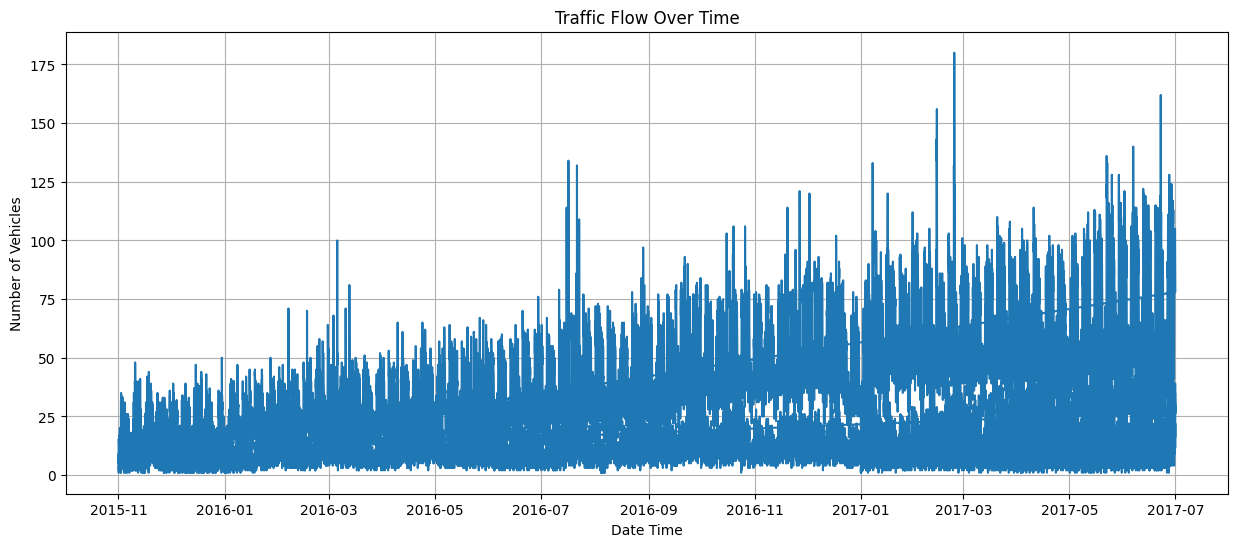

In [13]:

plt.figure(figsize=(15,6))
plt.plot(df['DateTime'], df['Vehicles'])
plt.xlabel('Date Time')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Flow Over Time')
plt.grid(True)
plt.show()


## Split the data into train and test

In [14]:

train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


In [15]:

n_past = 60
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data['Vehicles'].iloc[i - n_past:i].values)
    y_train.append(train_data['Vehicles'].iloc[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data['Vehicles'].iloc[i - n_past:i].values)
    y_test.append(test_data['Vehicles'].iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test)

In [16]:


print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)


Training set size:-
(38436, 60)
(38436,)


Testing set size:-
(9564, 60)
(9564,)


(None, None)

In [17]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


## Modeling


In [18]:

model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:

model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1,callbacks= [checkpoints, early_stopping])

Epoch 1/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 78s 65ms/step - loss: 331.5449 - val_loss: 30.6554
Epoch 2/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 70s 55ms/step - loss: 106.3808 - val_loss: 30.7598
Epoch 3/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 88s 59ms/step - loss: 67.5628 - val_loss: 34.2166
Epoch 4/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 79s 57ms/step - loss: 61.7481 - val_loss: 30.7981
Epoch 5/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 78s 54ms/step - loss: 56.5702 - val_loss: 29.9825
Epoch 6/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 90s 61ms/step - loss: 53.7084 - val_loss: 28.8308
Epoch 7/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 74s 54ms/step - loss: 52.9755 - val_loss: 29.5755
Epoch 8/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - loss: 50.2767 - val_loss: 32.7572
Epoch 9/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 66s 55ms/step - loss: 47.4452 - val_loss: 28.6710
Epoch 10/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - loss: 47.7867 - val_loss: 30.8918
Epoch 11/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 64s 53ms/step - loss: 45.5767 - va

In [22]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1202/1202 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


## Visualization of results


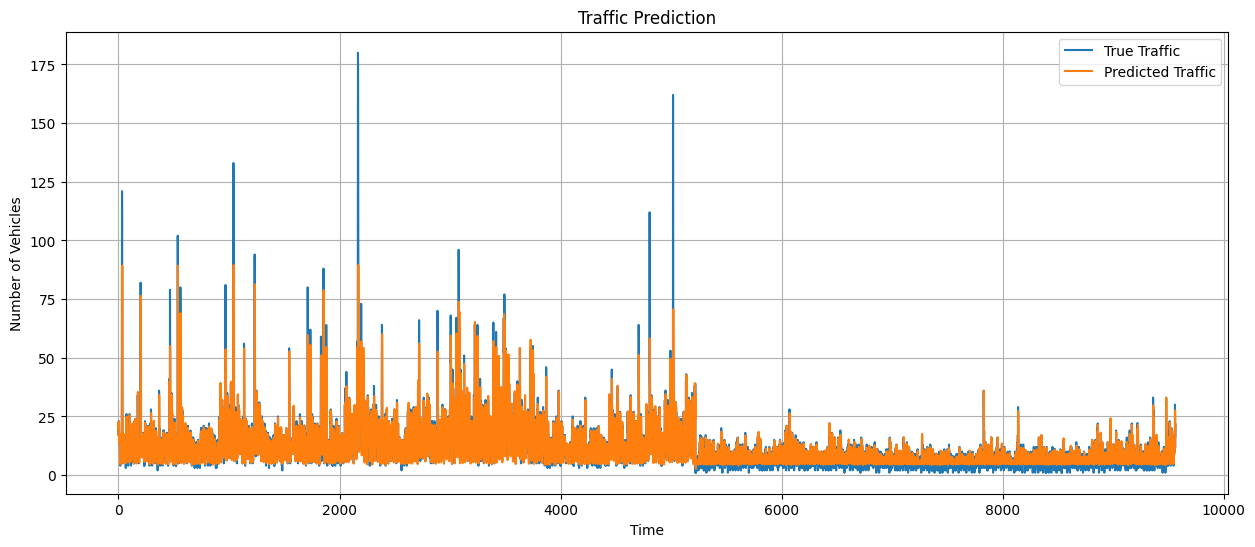

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True Traffic')
plt.plot(test_predict, label='Predicted Traffic')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [24]:

rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(rmse)


5.298625374669945
